<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%203%3A%20Prediction%20Modelling/3_9_Reinforcement_Learning_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinforcement Learning**
## **Q-Learning**

### **Problem Definition**
The well-known maze problem is used to demonstrate the use of Q-learning algorithms. There is a ***n x n*** grid, which allows players to move in four directions: north, south, east, and west. Certain cells contain obtacles. The agent begins in one cell and works its way to the target cell. The objective is to determine the optimal sequence of motions that will result in the agent reaching the goal cell with the greatest reward.
The Q-learning technique is employed in this case to solve this problem. The following steps in building the algorithm are as follows:
1.   Define the environment as a class of objects in which agents operate.
2. Define the agents as a class of objects.
3. Finally, we trained our agent how to behave in the described environment  to achieve its purpose.

In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#First define gridmaze environment as a class
class Environment():
  def __init__(self, height, width, blocked_cell, start_cell, end_cell, current_location):
    #Define the dimensions of grid and cell features
    self.height = height
    self.width = width
    self.blocked_cell = blocked_cell
    self.end_cell = end_cell
    self.start_cell = start_cell
    self.current_location = current_location
    self.state_space=[]
    self.create_state_space()

    #Define the immediate reward of each cell if the agent reach moves that cell
    self.cell_reward = np.zeros((self.height, self.width))-1 #When agent moves from one cell to another, it gets -1 reward
    self.cell_reward[self.end_cell[0], self.end_cell[1]] = 10 #if the agent reaches the end cell, gets 10 reward
    self.cell_reward[self.blocked_cell[0], self.blocked_cell[1]] = -10 #if the agent tries to move the blocked cell, it gets -10 reward

    self.actions = ['Left', 'Right', 'Up','Down'] # There are 4 possible actions of the agent.

  def get_actions(self):
      return self.actions
  def create_state_space(self):    
      for i in range(self.height):
        for j in range(self.width):
          if (i,j)!=self.blocked_cell:
            self.state_space.append((i,j))    

  def return_reward(self, next_location):
     return self.cell_reward[next_location[0], next_location[1]]

  def check_end_cell(self):
      if self.current_location == self.end_cell:
        return True
  def check_blocked_cell(self):
      if self.current_location == self.blocked_cell:
        return True    
  
  def reset(self):
    self.current_location = self.state_space[np.random.choice(len(self.state_space))]
    while self.current_location==self.end_cell:
      self.current_location = self.state_space[np.random.choice(len(self.state_space))]
    
  def step(self, action):
        """Directs the agent forward. If agent is at the border of or adjacent to a blocked cell, the agent's position is unaffected; however, 
        the agent takes a negative reward. Reward is returned by function."""
              
        last_location = self.current_location
        
        # UP
        if action == 'Up':
            # If agent is at the top, stay still, collect reward
            if last_location[0] == 0:
                reward = self.return_reward(last_location)
            elif (last_location[0]-1, last_location[1]) == self.blocked_cell:
               reward = self.return_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] - 1, self.current_location[1])
                reward = self.return_reward(self.current_location)
        
        # DOWN
        elif action == 'Down':
            # If agent is at bottom, stay still, collect reward
            if last_location[0] == self.height - 1:
                reward = self.return_reward(last_location)
            elif (last_location[0]+1, last_location[1]) == self.blocked_cell:
                reward = self.return_reward(last_location)
            else:
                self.current_location = (self.current_location[0] + 1, self.current_location[1])
                reward = self.return_reward(self.current_location)
            
        # LEFT
        elif action == 'Left':
            # If agent is at the left, stay still, collect reward
            if last_location[1] == 0:
                reward = self.return_reward(last_location)
            elif (last_location[0], last_location[1]-1) == self.blocked_cell:
                reward = self.return_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] - 1)
                reward = self.return_reward(self.current_location)

        # RIGHT
        elif action == 'Right':
            # If agent is at the right, stay still, collect reward
            if last_location[1] == self.width - 1:
                reward = self.return_reward(last_location)
            elif (last_location[0], last_location[1]+1) == self.blocked_cell:
                reward = self.return_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] + 1)
                reward = self.return_reward(self.current_location)
                
        return reward

In [3]:
environment = Environment(height=4, width=4, blocked_cell= (2,2), start_cell= (0,0), end_cell = (3,3), current_location = (0,0))

In [4]:
class Agent():
  def __init__(self, environment, epsilon=0.05, gamma=0.9, alpha=0.1):
    self.environment = environment
    self.epsilon = epsilon
    self.gamma = gamma
    self.alpha = alpha
    self.Qtable = {}
    for s in environment.state_space:
        self.Qtable[s]={}
        for a in environment.actions:
          self.Qtable [s][a] = 0 #Initializing the Q-table, filling it with zeros.
 
  def epsilon_greedy(self, actions):
    if np.random.uniform(0,1)<self.epsilon:
        action = actions[np.random.randint(0,len(actions)-1)]
    else:
        maxValue = max(self.Qtable[self.environment.current_location].values())
        action = np.random.choice([k for k, v in self.Qtable[self.environment.current_location].items() if v == maxValue])
    return action
    
  def update_Qtable(self, old_state, action, new_state, reward):
     max_q_value_in_new_state = max(self.Qtable[new_state].values())
     current_q_value = self.Qtable[old_state][action]        
     self.Qtable[old_state][action] = (1 - self.alpha) * current_q_value + self.alpha * (reward + self.gamma * max_q_value_in_new_state)

In [5]:
def play(environment, agent, episode, max_steps_per_episode):
  reward_of_per_episode = []
  for i in range(episode):
     cumulative_reward = 0
     step = 0
     game_over = False
    
     while step<max_steps_per_episode and game_over == False:
       old_state = environment.current_location
       action = agent.epsilon_greedy(environment.actions)
       reward = environment.step(action)
       
       new_state = environment.current_location
       agent.update_Qtable(old_state, action, new_state, reward)

       step+=1
       cumulative_reward+=reward

       if environment.check_end_cell():
         game_over = True
         environment.reset()
      
     reward_of_per_episode.append(cumulative_reward)
   
  return reward_of_per_episode

In [6]:
environment = Environment(height=4, width=4, blocked_cell= (2,2), start_cell= (0,0), end_cell = (3,3), current_location = (0,0))
agent = Agent(environment)
reward_per_episode = play(environment, agent, episode=10000, max_steps_per_episode=1000)

In [7]:
# determine the policy from Q*
policy = {}
V = {}
for s in environment.state_space:
    if s!=environment.end_cell:
      environment.current_location=s
      maxValue = max(agent.Qtable[environment.current_location].values())
      action = np.random.choice([k for k, v in agent.Qtable[environment.current_location].items() if v == maxValue])
      policy[s] = action
      V[s] = maxValue

In [8]:
V

{(0, 0): 1.8097999999999896,
 (0, 1): 3.1219999999999883,
 (0, 2): 4.57999999999999,
 (0, 3): 6.19999999999999,
 (1, 0): 3.1219999999999883,
 (1, 1): 4.57999999999999,
 (1, 2): 6.19999999999999,
 (1, 3): 7.999999999999996,
 (2, 0): 4.57999999999999,
 (2, 1): 6.19999999999999,
 (2, 3): 9.999999999999995,
 (3, 0): 6.19999999999999,
 (3, 1): 7.999999999999996,
 (3, 2): 9.999999999999995}

In [9]:
#Function to print policy on a grid
def print_policy(policy,rows,columns):
    for i in range(rows):
        print("---------------------------------------")
        for j in range(columns):
              a = policy.get((i,j), ' ')
              print("  %s  |" % a, end="")
        print("")

In [10]:
print_policy(policy,4,4)

---------------------------------------
  Right  |  Down  |  Down  |  Down  |
---------------------------------------
  Right  |  Down  |  Right  |  Down  |
---------------------------------------
  Right  |  Down  |     |  Down  |
---------------------------------------
  Right  |  Right  |  Right  |     |


In [11]:
#Function to print values on a grid
def print_values(V, rows,columns):
    for i in range(rows):
        print("---------------------------")
        for j in range(columns):
            v = V.get((i,j), 0)
            if v >= 0:
                print(" %.2f|" % v, end="")
            else:
                print("%.2f|" % v, end="")
        print("")

In [12]:
print_values(V, 4,4)

---------------------------
 1.81| 3.12| 4.58| 6.20|
---------------------------
 3.12| 4.58| 6.20| 8.00|
---------------------------
 4.58| 6.20| 0.00| 10.00|
---------------------------
 6.20| 8.00| 10.00| 0.00|


### **Results** 
The next figure demonstrates that after a few episodes, our Q-learning algorithm converges and our agent has learned how to behave optimally in the specified environment.

Text(0, 0.5, 'Cumulative reward')

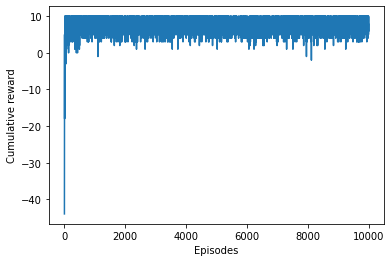

In [13]:
# Simple learning curve
plt.plot(reward_per_episode)
plt.xlabel('Episodes')
plt.ylabel('Cumulative reward')